# FASHION MNIST

# LOADING THE DATA

In [2]:
# IMPORTING LIBRARIES

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#IMPROTING THE FASHION DATASET

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# AS, Each image is mapped into a single label. Since the class names are not defined in the dataset, we need to store them in the variable 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# DATA PREPROCESSING

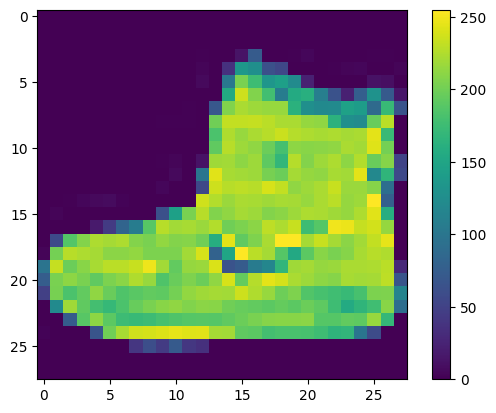

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# RESCALING THE DATASET

train_images = train_images / 255.0
test_images = test_images / 255.0

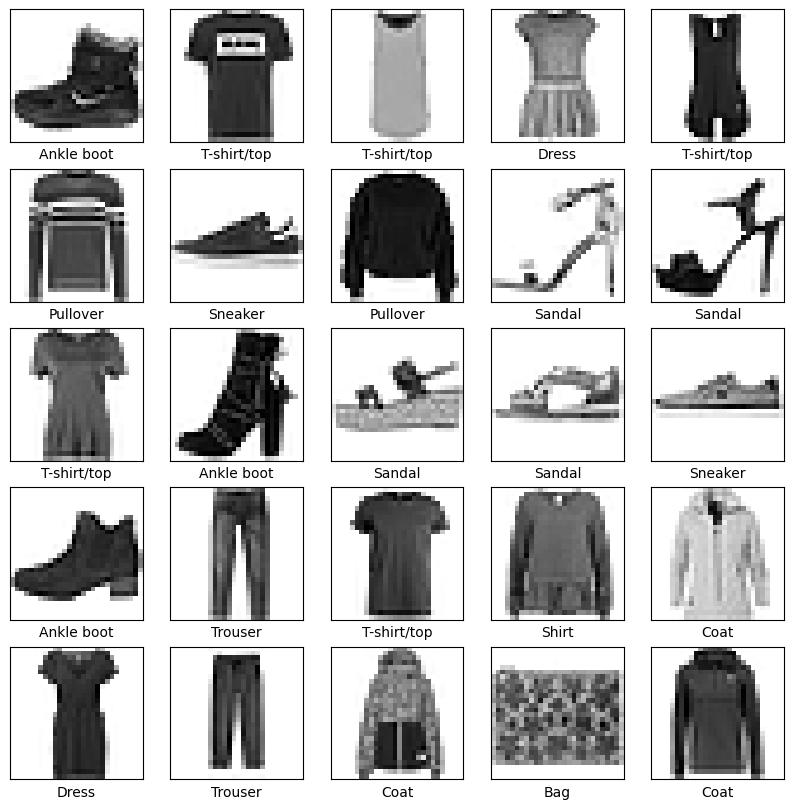

In [7]:
# PLOTTING ALL THE LABELS

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# BUILDING MODEL

In [8]:
# SETTING UP LAYERS

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

# COMPILING THE MODEL

In [9]:
# COMPILING THE MODEL

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
             )

# TRAINING THE MODEL

In [10]:
#Fitting the model

model.fit(train_images, train_labels, epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 2s 992us/step - loss: 0.4934 - accuracy: 0.8272
Epoch 2/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.3735 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3344 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.3119 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 976us/step - loss: 0.2919 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2786 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2670 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2561 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 2s 995us/step - loss: 0.2468 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 2s 998us/step -

In [12]:
# Evaluating Accuracy

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest Accuracy :', test_acc)

313/313 - 0s - loss: 0.3402 - accuracy: 0.8825 - 324ms/epoch - 1ms/step

Test Accuracy : 0.8824999928474426


# MAKING PREDICITION



In [15]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 645us/step


array([2.8189687e-08, 8.7886594e-11, 6.0441777e-11, 2.0003268e-10,
       7.8532825e-09, 7.6272132e-05, 3.4038667e-09, 1.1734079e-02,
       9.4783026e-10, 9.8818958e-01], dtype=float32)

In [17]:
# MODEL WITH THE HIGHEST CONFIDENCE

np.argmax(predictions[0])

# ANKLE BOOT HAS THE HIGHEST CONFIDENCE

9

In [21]:
# CHECKING THE LABELS

test_labels[0]

9

In [24]:
#PLOTTING THE PREDICTIONS

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


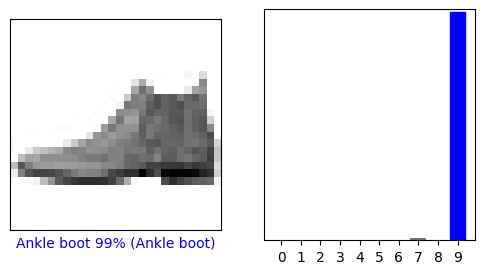

In [26]:
# VERIFY THE PREDICTIONS

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

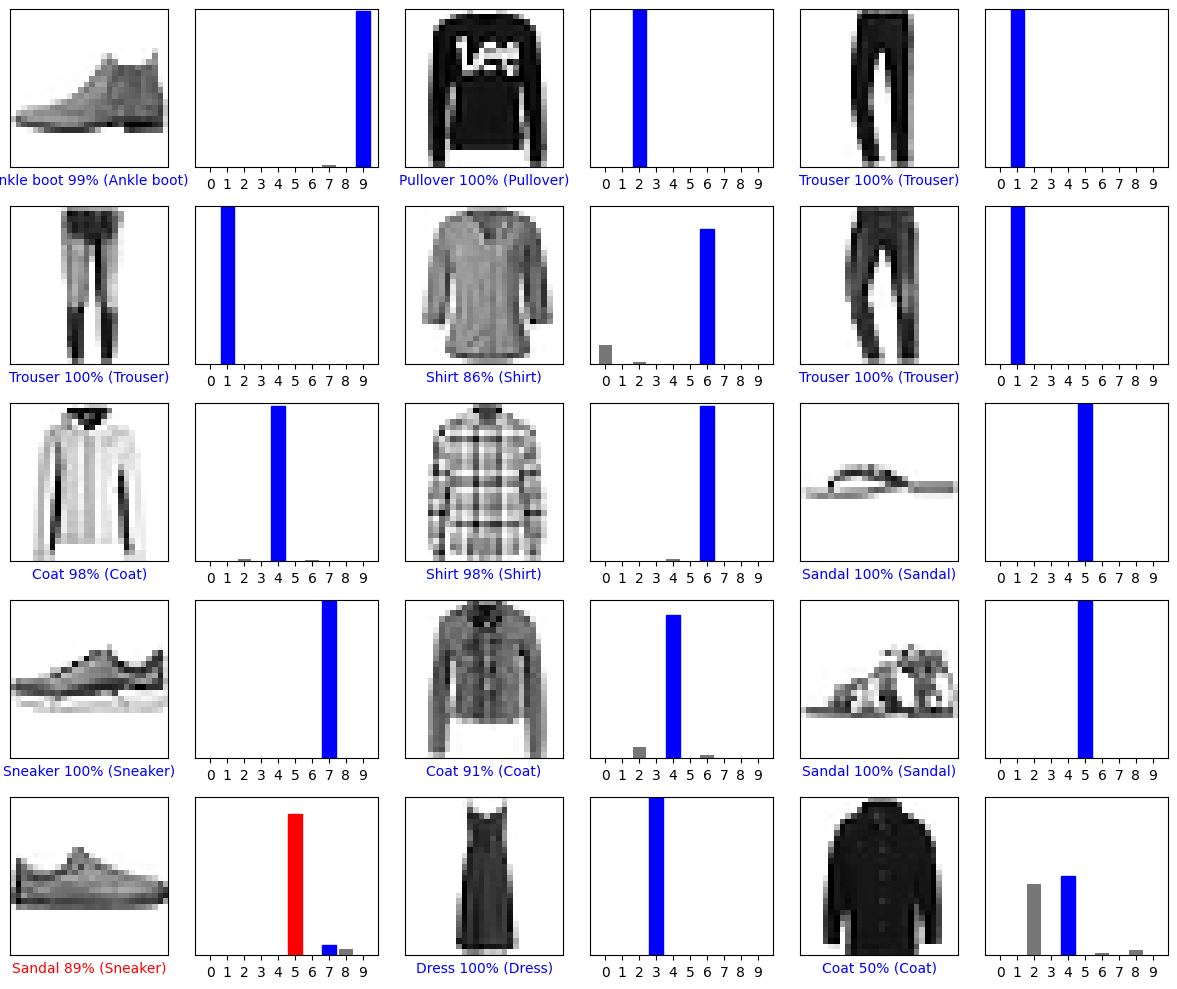

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

BLUE COLOR GIVES THE CORRECT PREDICTION AND RED COLOR GIVES THE INCORRECT PREDICITON
